In [117]:
pip install plotly

In [118]:
import numpy as np
import pandas as pd
import os
import glob
from datetime import datetime
# import timestamp
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce

from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures

import plotly.express as px

In [322]:

class Data():
    def __init__(self, path = None):
        
        self.directory = (glob.glob("/Data*merged.csv")) 
        # Add All the functionality to the class for organisation
        self.dailyNames = (glob.glob("daily*merged.csv")) 


        self.init()
        self.pdfs = []
        self.dailies = {}
    def init(self):
        for idx, dataName in enumerate(self.directory):
            self.pdfs.append(self.getDF(-1,dataName))

        for idx, data in enumerate(self.dailyNames):
            self.dailies[data]  =self.getDF(data)


    def getDF(self, i, byname =0):
        if(byname != 0):
            return(pd.read_csv(byname))
        return(pd.read_csv(self.directory[i]))





def containTimeInstant():
    timeList = ["time, "]

def read_file(path, expend_print = False, convertTimeDate = False):
    """ 
    read files
    """
    # formatting to pandas
    pd.Timestamp('2014-01-23 00:00:00', tz=None).to_pydatetime()

    print(path)
    
    # read csv
    df  = pd.read_csv(path)
    if(expend_print):
        print(path)
        print(f"Size: {df.shape}")
        print(df.head(10))
        print(df.columns)
        print((df.Id.unique()))
        print((list(df.columns)))
    df.dropna(subset=list(df.columns), how='any', axis=0).reset_index(inplace = True)

    if(convertTimeDate):
        pass

    ID = "Id"
    if ID in list(df.columns):
        # df['date_column'] = pd.to_datetime(df['datetime_column']).dt.date
        return df
    return None


def saved_file(df, name ):
    df.to_csv(f'{name}.csv')

def merge_data_to_one(files, safefile = False, saveFileName = "OutputMerged"):
    outputMerged = pd.DataFrame()
    
    for idx, fileName in enumerate(set(files)):
        data = read_file(fileName)
        if isinstance(data, pd.DataFrame):
            print(fileName)
            if(idx<1):
                outputMerged = data
            else:
                pd.merge(outputMerged, data, on = 'Id', how="left")
    
    if safefile: saved_file(outputMerged, saveFileName)


def compareSimilarity(A, B):
    A.sort()
    B.sort()

    max_val = max([len(A),len(B)])

    if max_val == len(A):arrMax, secondMax =A, B 
    else: arrMax, secondMax =A, B = A, B 
    
    sumCountSimilarities = 0

    sum_=0
    for i in list(arrMax):
        for j in list(secondMax):
            if i==j:
                if i<j : break
                sumCountSimilarities+=1
                break
             
    return (sumCountSimilarities, sumCountSimilarities/max_val)


def compareamountof(lists):
    l = len(lists)
    output = []

    for i in range(l):
        for j in range(i, l):
            A = read_file(lists[i])
            B = read_file(lists[j])


            similarities, ratiosim = compareSimilarity(A.Id.unique(), B.Id.unique())
            output.append([lists[i], lists[j],similarities, ratiosim])

    return output


def divideInsertTime(data, colName):
    # time_col_split = data.colName.str.split(" ")
    # split_amount = len(list(time_col_split[0]))

    date = pd.to_datetime(data[colName])
    try:
        Id_To_Idx = {id :num for num,id in enumerate(Heart_By_Idx.Id.unique())}
        Heart_By_Idx['PersonID'] = data.Id.map(Id_To_Idx)

        data["Hour"] = date.dt.hour
        data["Day"]  = date.dt.day 
        data["Minute"] = date.dt.minute
        data["DateOfWeek"] = date.dt.day_name()      
        print("Date Changed")
    except:
        e = sys.exc_info()
        print(f"Could Not Prase Data: Check Col Name; Erorr: {sys.exc_info()}")        

    return data




def pvalue_test(data, col_name, based_on_col_vals = None, tresh = 0.05):
    i = 0
    significant = []
    if based_on_col_vals ==None:
        print(data.columns)
        based_on_col_vals = data[col_name]
    print(f"Based on column: {col_name}")
    for (columnName, columnData) in data.iteritems():
        if i>1:
            stat, p = kendalltau(columnData, based_on_col_vals)
            print('Column Name : ', columnName)
            print(p)
            if(p<tresh):
                print(f"Significant - {p} - to {col_name} with {columnName}")
                significant.append((p,col_name, columnName))
        i +=1
    return significant


def sliceDataBasedonDescribeval(data, col,dateCol, tresh = 5):
    dis = data.describe()
    list_col = list((((dis.loc[col][dis.loc['std']>tresh]))).index)
    list_col.append(dateCol)

    return data[list_col]

#TODO : Set Index: data.set_index("Id")

In [317]:
active

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,2016-05-09,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,2016-05-10,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,2016-05-11,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832


In [75]:
data_csvs = (glob.glob("../Data/*merged.csv")) 
data_csvs


['../Data\\dailyActivity_merged.csv',
 '../Data\\dailyCalories_merged.csv',
 '../Data\\dailyIntensities_merged.csv',
 '../Data\\dailySteps_merged.csv',
 '../Data\\heartrate_seconds_merged.csv',
 '../Data\\hourlyCalories_merged.csv',
 '../Data\\hourlyIntensities_merged.csv',
 '../Data\\hourlySteps_merged.csv',
 '../Data\\minuteCaloriesNarrow_merged.csv',
 '../Data\\minuteCaloriesWide_merged.csv',
 '../Data\\minuteIntensitiesNarrow_merged.csv',
 '../Data\\minuteIntensitiesWide_merged.csv',
 '../Data\\minuteMETsNarrow_merged.csv',
 '../Data\\minuteSleep_merged.csv',
 '../Data\\minuteStepsNarrow_merged.csv',
 '../Data\\minuteStepsWide_merged.csv',
 '../Data\\sleepDay_merged.csv',
 '../Data\\weightLogInfo_merged.csv']

In [76]:
dailyData = (glob.glob("../Data/daily*merged.csv"))  +  (glob.glob("../Data/heartrate*merged.csv")) 


In [77]:
print(compareamountof(dailyData))

../Data\dailyActivity_merged.csv
../Data\dailyActivity_merged.csv
../Data\dailyActivity_merged.csv
../Data\dailyCalories_merged.csv
../Data\dailyActivity_merged.csv
../Data\dailyIntensities_merged.csv
../Data\dailyActivity_merged.csv
../Data\dailySteps_merged.csv
../Data\dailyActivity_merged.csv
../Data\heartrate_seconds_merged.csv
../Data\dailyCalories_merged.csv
../Data\dailyCalories_merged.csv
../Data\dailyCalories_merged.csv
../Data\dailyIntensities_merged.csv
../Data\dailyCalories_merged.csv
../Data\dailySteps_merged.csv
../Data\dailyCalories_merged.csv
../Data\heartrate_seconds_merged.csv
../Data\dailyIntensities_merged.csv
../Data\dailyIntensities_merged.csv
../Data\dailyIntensities_merged.csv
../Data\dailySteps_merged.csv
../Data\dailyIntensities_merged.csv
../Data\heartrate_seconds_merged.csv
../Data\dailySteps_merged.csv
../Data\dailySteps_merged.csv
../Data\dailySteps_merged.csv
../Data\heartrate_seconds_merged.csv
../Data\heartrate_seconds_merged.csv
../Data\heartrate_secon

In [78]:
steps = read_file(data_csvs[3])
steps.ActivityDay = pd.to_datetime(steps["ActivityDay"])
steps.rename(columns={"ActivityDay": "Day"}, inplace=True)
steps



../Data\dailySteps_merged.csv


,Id,Day,StepTotal
0,1503960366,2016-04-12,13162
1,1503960366,2016-04-13,10735
2,1503960366,2016-04-14,10460
3,1503960366,2016-04-15,9762
4,1503960366,2016-04-16,12669
...,...,...,...
935,8877689391,2016-05-08,10686
936,8877689391,2016-05-09,20226
937,8877689391,2016-05-10,10733
938,8877689391,2016-05-11,21420


In [79]:
calories = read_file(data_csvs[1])
calories.ActivityDay = pd.to_datetime(calories['ActivityDay'])
calories.rename(columns={"ActivityDay": "Day"}, inplace = True)
calories

../Data\dailyCalories_merged.csv


,Id,Day,Calories
0,1503960366,2016-04-12,1985
1,1503960366,2016-04-13,1797
2,1503960366,2016-04-14,1776
3,1503960366,2016-04-15,1745
4,1503960366,2016-04-16,1863
...,...,...,...
935,8877689391,2016-05-08,2847
936,8877689391,2016-05-09,3710
937,8877689391,2016-05-10,2832
938,8877689391,2016-05-11,3832


## Calories Exploration


In [80]:
sleep = read_file(data_csvs[-2])
sleep.SleepDay = pd.to_datetime(sleep['SleepDay'])
sleep.rename(columns={"SleepDay": "Day"}, inplace=True)
sleep.head()



../Data\sleepDay_merged.csv


,Id,Day,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,1,327,346
1,1503960366,2016-04-13,2,384,407
2,1503960366,2016-04-15,1,412,442
3,1503960366,2016-04-16,2,340,367
4,1503960366,2016-04-17,1,700,712


In [81]:
meged_cl_sle =calories.merge(sleep, left_on=["Id","Day" ], right_on=["Id", "Day"])
meged_cl_sle.drop(columns=["Id"], inplace= False).corr().round(2)


,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
Calories,1.00,-0.05,-0.03,-0.13
TotalSleepRecords,-0.05,1.00,0.17,0.17
TotalMinutesAsleep,-0.03,0.17,1.00,0.93
TotalTimeInBed,-0.13,0.17,0.93,1.00


In [101]:
pvalue_test(meged_cl_sle, 'Calories')

Index(['Id', 'Day', 'Calories', 'TotalSleepRecords', 'TotalMinutesAsleep',
       'TotalTimeInBed'],
      dtype='object')
Based on column: Calories
Column Name :  Calories
3.5779013524296563e-202
Significant - 3.5779013524296563e-202 - to Calories with Calories
Column Name :  TotalSleepRecords
0.3423283607567328
Column Name :  TotalMinutesAsleep
0.5307284261996352
Column Name :  TotalTimeInBed
0.000604580195595104
Significant - 0.000604580195595104 - to Calories with TotalTimeInBed


[(3.5779013524296563e-202, 'Calories', 'Calories'),
 (0.000604580195595104, 'Calories', 'TotalTimeInBed')]

Text(0.5, 1.0, 'Corr')

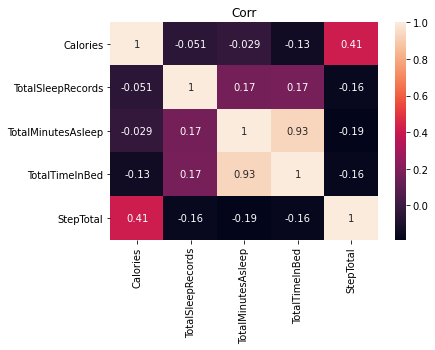

In [82]:
meged_cl_sle_steps =meged_cl_sle.merge(steps, left_on=["Id","Day" ], right_on=["Id", "Day"])
corr= meged_cl_sle_steps.drop(columns=["Id"], inplace= False).corr()


plot =sns.heatmap(corr, annot = True)
plot.set_title("Corr")

P Value 0.000604580195595104
[[ 0.         -0.79533102]]


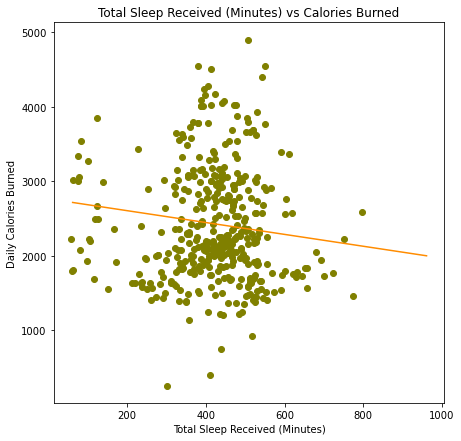

In [102]:
poly_reg = PolynomialFeatures(degree =1)

x = meged_cl_sle_steps['TotalTimeInBed'].values.reshape(-1,1)
y =meged_cl_sle_steps['Calories'].values.reshape(-1,1)
stat, p = kendalltau(x , y)
print(f"P Value {p}")

X_poly = poly_reg.fit_transform(x)
lin_reg = LinearRegression()

lin_reg.fit(X_poly,y)
print(lin_reg.coef_)
pred = lin_reg.predict(X_poly)

x_grid = np.arange(min(x),max(x),0.01)

plt.figure(figsize = (7,7))
plt.scatter(data = meged_cl_sle_steps,x = 'TotalMinutesAsleep',y = 'Calories',
            color = 'olive')
plt.plot(x_grid ,lin_reg.predict(poly_reg.fit_transform(x_grid.reshape(-1,1))),
         color = 'darkorange')
plt.xlabel("Total Sleep Received (Minutes)")
plt.ylabel("Daily Calories Burned")
plt.title("Total Sleep Received (Minutes) vs Calories Burned")
plt.show()

In [191]:
Id_To_Idx = {id :num for num,id in enumerate(meged_cl_sle_steps.Id.unique())}
Idx_to_Id = {num :id for num,id in enumerate(meged_cl_sle_steps.Id.unique())}
meged_cl_sle_steps['PersonID'] = meged_cl_sle_steps.Id.map(Id_To_Idx)
meged_cl_sle_steps.PersonID =  meged_cl_sle_steps.PersonID.astype('str')




[1503960366,
 1644430081,
 1844505072,
 1927972279,
 2026352035,
 2320127002,
 2347167796]

In [190]:
len(meged_cl_sle_steps.Id.unique())

24

In [159]:

t =meged_cl_sle_steps[meged_cl_sle_steps['Id'].isin(list(meged_cl_sle_steps.Id.unique())[:7])]

In [193]:
px.scatter(meged_cl_sle_steps, x = 'Calories', y = 'TotalTimeInBed',symbol = 'PersonID',color = 'PersonID', marginal_x='histogram',marginal_y = 'box' ,trendline  ='ols', height  =600, title ='Calories vs Total time In Bed')

d:\Anaconda_2\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning:

divide by zero encountered in double_scalars



In [194]:
meged_cl_sle_steps.head()

,Id,Day,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,StepTotal,DateSTR,PersonID
0,1503960366,2016-04-12,1985,1,327,346,13162,2016-04-12,0
1,1503960366,2016-04-13,1797,2,384,407,10735,2016-04-13,0
2,1503960366,2016-04-15,1745,1,412,442,9762,2016-04-15,0
3,1503960366,2016-04-16,1863,2,340,367,12669,2016-04-16,0
4,1503960366,2016-04-17,1728,1,700,712,9705,2016-04-17,0


In [195]:
dd = list(meged_cl_sle_steps.columns)
for i in dd:
    print(i)

Id
Day
Calories
TotalSleepRecords
TotalMinutesAsleep
TotalTimeInBed
StepTotal
DateSTR
PersonID


In [196]:
meged_cl_sle_steps.dtypes

Id                             int64
Day                   datetime64[ns]
Calories                       int64
TotalSleepRecords              int64
TotalMinutesAsleep             int64
TotalTimeInBed                 int64
StepTotal                      int64
DateSTR                       object
PersonID                      object
dtype: object

## Feedback
Two important issues, The total amount of records has only a weak potivie correlation with Total time in bed. Which is a little surprising. Yet total sleep  has a stronger negative correlation (yet still weak) with the duration which spent in bed yet smaller on the record of sleep

## Heart Rate Exploration

In [197]:
doClean = False

heart_rate = read_file(dailyData[4])
heart_rate.Time = pd.to_datetime(heart_rate.Time)

if doClean:
    HeartRateFiltered = divideInsertTime(heart_rate, "Time")

heart_rate["Date"] = heart_rate.Time.dt.date
heart_rate["Time"]  = heart_rate["Time"].dt.time


heart_rate_std = heart_rate.groupby(["Date", "Id"]).std()
heart_rate_mean = heart_rate.groupby(["Date", "Id"]).mean()
heart_rate_median = heart_rate.groupby(["Date", "Id"]).median()

../Data\heartrate_seconds_merged.csv


In [198]:

# compile the list of dataframes you want to merge
data_frames = [heart_rate_std, heart_rate_mean, heart_rate_median]
nan_value = 0

result_1 = pd.concat(data_frames, join='outer', axis=1).fillna(nan_value)

result_2 = reduce(lambda df_left,df_right: pd.merge(df_left, df_right, 
                                              left_index=True, right_index=True, 
                                              how='outer'), 
                  data_frames).fillna(nan_value)

In [199]:
arr_idx = np.array([(list(values)[0],  list(values)[1]) for values in (result_2.index)])

result_2["Date"] = arr_idx[:,0]
result_2["Id"] = arr_idx[:,1]
result_2.rename(columns = {"Value_x": "Std","Value_y": "Mean", "Value": "Mediam"}, inplace = True)

Dropeed_Indx_HeartRate = result_2.reset_index(drop=True)


In [200]:

data_frames2 = [Dropeed_Indx_HeartRate, meged_cl_sle_steps]
result_3 = pd.concat(data_frames2, join='outer', axis=0).fillna(nan_value)

result_4 = reduce(lambda df_left,df_right: pd.merge(df_left, df_right, 
                                              left_index=True, right_index=True, 
                                              how='outer'), 
                  data_frames).fillna(nan_value)

# left_index=True, right_index=True

In [201]:
Dropeed_Indx_HeartRate.Date.astype('str')

meged_cl_sle_steps["DateSTR"]  =  meged_cl_sle_steps["Day"].astype('str')

In [202]:
Dropeed_Indx_HeartRate["TimeSTR"] = Dropeed_Indx_HeartRate.Date.astype('str')

In [203]:
totalMerge = meged_cl_sle_steps.merge(Dropeed_Indx_HeartRate, left_on=["Id","DateSTR" ], right_on=["Id", "TimeSTR"]).drop(columns=["Date", "TimeSTR", "DateSTR"])

In [204]:
pvalue_test(totalMerge,'TotalTimeInBed' )

Index(['Id', 'Day', 'Calories', 'TotalSleepRecords', 'TotalMinutesAsleep',
       'TotalTimeInBed', 'StepTotal', 'PersonID', 'Std', 'Mean', 'Mediam'],
      dtype='object')
Based on column: TotalTimeInBed
Column Name :  Calories
0.006294480627705855
Significant - 0.006294480627705855 - to TotalTimeInBed with Calories
Column Name :  TotalSleepRecords
3.778855922199181e-05
Significant - 3.778855922199181e-05 - to TotalTimeInBed with TotalSleepRecords
Column Name :  TotalMinutesAsleep
1.3917050034696423e-70
Significant - 1.3917050034696423e-70 - to TotalTimeInBed with TotalMinutesAsleep
Column Name :  TotalTimeInBed
7.058405058894521e-89
Significant - 7.058405058894521e-89 - to TotalTimeInBed with TotalTimeInBed
Column Name :  StepTotal
0.05893542732357826
Column Name :  PersonID
0.5838808044638211
Column Name :  Std
0.0025040376104429316
Significant - 0.0025040376104429316 - to TotalTimeInBed with Std
Column Name :  Mean
0.042372952214196624
Significant - 0.042372952214196624 - to TotalT

[(0.006294480627705855, 'TotalTimeInBed', 'Calories'),
 (3.778855922199181e-05, 'TotalTimeInBed', 'TotalSleepRecords'),
 (1.3917050034696423e-70, 'TotalTimeInBed', 'TotalMinutesAsleep'),
 (7.058405058894521e-89, 'TotalTimeInBed', 'TotalTimeInBed'),
 (0.0025040376104429316, 'TotalTimeInBed', 'Std'),
 (0.042372952214196624, 'TotalTimeInBed', 'Mean')]

In [212]:
totalMerge.dtypes

Id                            object
Day                   datetime64[ns]
Calories                       int64
TotalSleepRecords              int64
TotalMinutesAsleep             int64
TotalTimeInBed                 int64
StepTotal                      int64
PersonID                      object
Std                          float64
Mean                         float64
Mediam                         int64
dtype: object

In [205]:
px.scatter(totalMerge, x = 'Std', y = 'TotalTimeInBed',symbol = 'Id',color = 'Id', marginal_x='histogram',marginal_y = 'box' ,trendline  ='ols', height  =600, title ='Calories vs Total time In Bed')

In [218]:
px.scatter_3d(totalMerge, x = 'Std',y = 'Calories', z = 'TotalTimeInBed', symbol = 'Id',color = 'Id')

Text(0.5, 1.0, 'Corr')

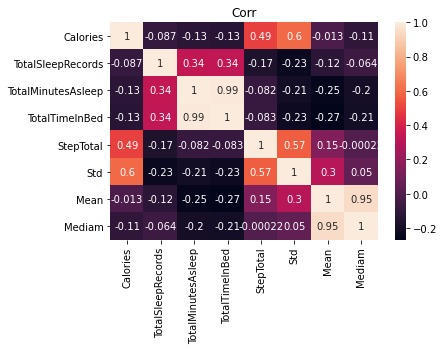

In [220]:
TotalCorr = totalMerge.corr()

plot =sns.heatmap(TotalCorr, annot = True)
plot.set_title("Corr")

In [221]:
totalMerge

,Id,Day,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,StepTotal,PersonID,Std,Mean,Mediam
0,2026352035,2016-04-17,1214,1,437,498,838,4,3.486183,68.656250,68
1,2026352035,2016-04-25,1576,1,506,531,6017,4,7.662667,99.505814,98
2,2026352035,2016-05-02,1690,1,511,543,7018,4,9.091549,84.134571,81
3,2026352035,2016-05-09,1869,1,531,556,10685,4,9.533803,98.233901,98
4,2347167796,2016-04-13,2038,1,467,531,10352,6,13.014521,73.812905,71
...,...,...,...,...,...,...,...,...,...,...,...
177,8792009665,2016-04-30,2896,1,343,360,7174,23,14.072832,81.464642,81
178,8792009665,2016-05-01,1962,1,503,527,1619,23,9.892940,67.810171,66
179,8792009665,2016-05-02,2015,1,415,423,1831,23,10.397178,67.403919,65
180,8792009665,2016-05-03,2297,1,516,545,2421,23,12.616910,74.371940,74


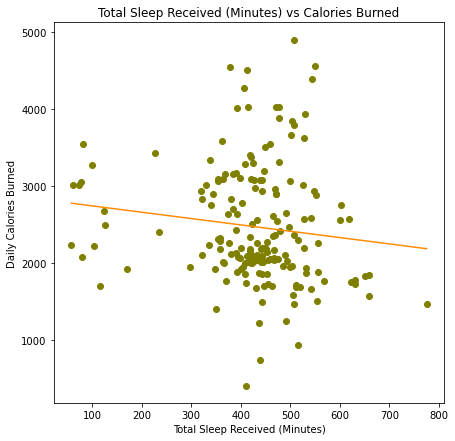

In [222]:
poly_reg = PolynomialFeatures(degree =1)
x = totalMerge['TotalMinutesAsleep'].values.reshape(-1,1)
y =totalMerge['Calories'].values.reshape(-1,1)
X_poly = poly_reg.fit_transform(x)
lin_reg = LinearRegression()

lin_reg.fit(X_poly,y)
pred = lin_reg.predict(X_poly)

x_grid = np.arange(min(x),max(x),0.01)

plt.figure(figsize = (7,7))
plt.scatter(data = totalMerge,x = 'TotalMinutesAsleep',y = 'Calories',
            color = 'olive')
plt.plot(x_grid ,lin_reg.predict(poly_reg.fit_transform(x_grid.reshape(-1,1))),
         color = 'darkorange')
plt.xlabel("Total Sleep Received (Minutes)")
plt.ylabel("Daily Calories Burned")
plt.title("Total Sleep Received (Minutes) vs Calories Burned")
plt.show()

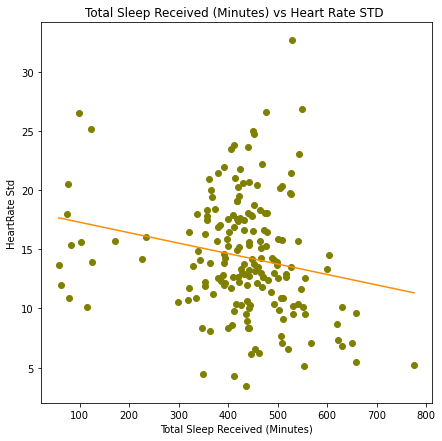

In [223]:
poly_reg = PolynomialFeatures(degree =1)
x = totalMerge['TotalMinutesAsleep'].values.reshape(-1,1)
y =totalMerge['Std'].values.reshape(-1,1)
X_poly = poly_reg.fit_transform(x)
lin_reg = LinearRegression()

lin_reg.fit(X_poly,y)
pred = lin_reg.predict(X_poly)

x_grid = np.arange(min(x),max(x),0.01)

plt.figure(figsize = (7,7))
plt.scatter(data = totalMerge,x = 'TotalMinutesAsleep',y = 'Std',
            color = 'olive')
plt.plot(x_grid ,lin_reg.predict(poly_reg.fit_transform(x_grid.reshape(-1,1))),
         color = 'darkorange')
plt.xlabel("Total Sleep Received (Minutes)")
plt.ylabel("HeartRate Std")
plt.title("Total Sleep Received (Minutes) vs Heart Rate STD ")
plt.show()

In [224]:
Heart_By_Idx.astype('str').replace(':', '/')

,Id,Time,Value,Date,PersonID,dif
0,2022484408,07:21:00,97,2016-04-12,0,0
1,2022484408,07:21:05,102,2016-04-12,0,5
2,2022484408,07:21:10,105,2016-04-12,0,3
3,2022484408,07:21:20,103,2016-04-12,0,-2
4,2022484408,07:21:25,101,2016-04-12,0,-2
...,...,...,...,...,...,...
2483653,8877689391,14:43:53,57,2016-05-12,13,-1
2483654,8877689391,14:43:58,56,2016-05-12,13,-1
2483655,8877689391,14:44:03,55,2016-05-12,13,-1
2483656,8877689391,14:44:18,55,2016-05-12,13,0


In [225]:
Heart_By_Idx = heart_rate #.set_index("Id")
Id_To_Idx = {id :num for num,id in enumerate(Heart_By_Idx.Id.unique())}
Idx_to_Id = {num :id for num,id in enumerate(Heart_By_Idx.Id.unique())}
Heart_By_Idx['PersonID'] = Heart_By_Idx.Id.map(Id_To_Idx)



## Heart Rate Exploration 1
 


In [226]:
Heart_By_Idx
Heart_By_Idx['Date'] = pd.to_datetime(Heart_By_Idx['Date'])
Heart_By_Idx['dif'] = Heart_By_Idx.groupby(['Id', 'Date'])['Value'].diff().fillna(0).astype(int)


In [264]:
dif_Df_HeartRate = pd.DataFrame(columns = ["Id", "Date","stdChange", "maxChange", "minChange", "numOfDrasticPositiveChanges", "numOfDrasticNegativeChanges" ])
index = 0
for i in range(len(Heart_By_Idx.PersonID.unique())):
    data_= Heart_By_Idx.loc[Heart_By_Idx.PersonID ==i]

    for day_num, day in enumerate(data_.Date.unique()):
        # print(data_[data_.Date ==day])
        data_[data_.Date ==day]['dif']
        # print(data_)

        maxChange =data_[data_.Date ==day]['dif'].max()
        stdChange =data_[data_.Date ==day]['dif'].std()
        MedianChange =data_[data_.Date ==day]['dif'].median()
        MinChange =data_[data_.Date ==day]['dif'].min()

        # print(stdChange)
        arr = np.array(data_[data_.Date ==day]['dif'])
        # num_of_P_drastic_changes = np.sum(np.where((np.array(data_[data_.Date ==day]['dif'])> 3*float(stdChange))and ((np.array(data_[data_.Date ==day]['dif'])> 3*float(stdChange))),1,0))
        # num_of_N_drastic_changes = np.sum(np.where(np.array(data_[data_.Date ==day]['dif'])> 3*float(stdChange),1,0))
        num_of_P_drastic_changes = np.sum(np.where((np.abs(arr)> 2.5*float(stdChange)) & ((arr)> 0),1,0))

        num_of_N_drastic_changes = np.sum(np.where((np.abs(arr)> 2.5*float(stdChange)) & ((arr)< 0),1,0))

        # print(num_of_drastic_changes)
        dif_Df_HeartRate.loc[index]= [Idx_to_Id[i], day, stdChange, float(maxChange), float(MinChange), float(num_of_P_drastic_changes), float(num_of_N_drastic_changes)]
        index+=1



In [265]:
dif_Df_HeartRate.dtypes

Id                                     object
Date                           datetime64[ns]
stdChange                             float64
maxChange                             float64
minChange                             float64
numOfDrasticPositiveChanges           float64
numOfDrasticNegativeChanges           float64
dtype: object

In [266]:
dif_Df_HeartRate.Date = dif_Df_HeartRate.Date.astype('str')
sleep.Day = sleep.Day.astype('str')

sleep_heartRate = dif_Df_HeartRate.merge(sleep,left_on=["Id","Date" ],  right_on= ["Id","Day" ]).drop(columns = ['Day'])
sleep_heartRate.corr()

,stdChange,maxChange,minChange,numOfDrasticPositiveChanges,numOfDrasticNegativeChanges,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
stdChange,1.000000,0.450384,-0.415020,-0.526933,-0.447681,0.018269,-0.102408,-0.127375
maxChange,0.450384,1.000000,-0.433177,-0.268518,-0.266395,-0.082170,-0.022764,-0.027075
minChange,-0.415020,-0.433177,1.000000,0.208408,0.175610,0.148162,0.112242,0.131015
numOfDrasticPositiveChanges,-0.526933,-0.268518,0.208408,1.000000,0.817420,0.033493,0.019090,0.030914
numOfDrasticNegativeChanges,-0.447681,-0.266395,0.175610,0.817420,1.000000,-0.032143,0.043590,0.062500
TotalSleepRecords,0.018269,-0.082170,0.148162,0.033493,-0.032143,1.000000,0.336583,0.335080
TotalMinutesAsleep,-0.102408,-0.022764,0.112242,0.019090,0.043590,0.336583,1.000000,0.991996
TotalTimeInBed,-0.127375,-0.027075,0.131015,0.030914,0.062500,0.335080,0.991996,1.000000


Text(0.5, 1.0, 'Radical Heart Rate Changes to Sleep Quality Corr')

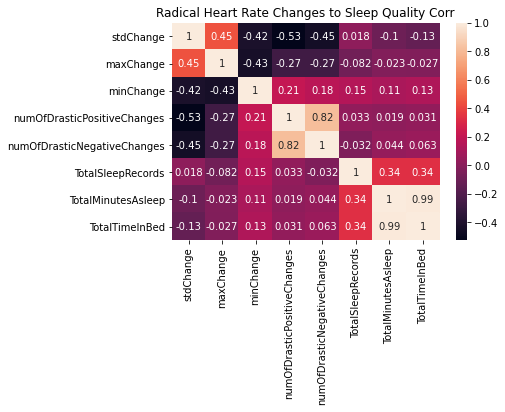

In [267]:
dif_Df_HeartRate.Date = dif_Df_HeartRate.Date.astype('str')
sleep.Day = sleep.Day.astype('str')

sleep_heartRate = dif_Df_HeartRate.merge(sleep,left_on=["Id","Date" ],  right_on= ["Id","Day" ]).drop(columns = ['Day'])
corr_sleepHearRate = sleep_heartRate.corr()


plot =sns.heatmap(corr_sleepHearRate, annot = True)
plot.set_title("Radical Heart Rate Changes to Sleep Quality Corr")

In [268]:
pvalue_test(sleep_heartRate, 'TotalTimeInBed')

Index(['Id', 'Date', 'stdChange', 'maxChange', 'minChange',
       'numOfDrasticPositiveChanges', 'numOfDrasticNegativeChanges',
       'TotalSleepRecords', 'TotalMinutesAsleep', 'TotalTimeInBed'],
      dtype='object')
Based on column: TotalTimeInBed
Column Name :  stdChange
0.6595543666128949
Column Name :  maxChange
0.6708912267390398
Column Name :  minChange
0.1022682253466186
Column Name :  numOfDrasticPositiveChanges
0.38752429165023194
Column Name :  numOfDrasticNegativeChanges
0.7415288433574434
Column Name :  TotalSleepRecords
3.778855922199181e-05
Significant - 3.778855922199181e-05 - to TotalTimeInBed with TotalSleepRecords
Column Name :  TotalMinutesAsleep
1.3917050034696423e-70
Significant - 1.3917050034696423e-70 - to TotalTimeInBed with TotalMinutesAsleep
Column Name :  TotalTimeInBed
7.058405058894521e-89
Significant - 7.058405058894521e-89 - to TotalTimeInBed with TotalTimeInBed


[(3.778855922199181e-05, 'TotalTimeInBed', 'TotalSleepRecords'),
 (1.3917050034696423e-70, 'TotalTimeInBed', 'TotalMinutesAsleep'),
 (7.058405058894521e-89, 'TotalTimeInBed', 'TotalTimeInBed')]

## Activety vs sleep

In [351]:
active =read_file(data_csvs[0])
active.ActivityDate = pd.to_datetime(active.ActivityDate)
active.ActivityDate = active.ActivityDate.astype('str')



active.head()

../Data\dailyActivity_merged.csv


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,PersonID
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,0
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,0
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,0
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,0
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,0


In [352]:
active.describe().index

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

In [353]:
active.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


In [360]:
dis = active.describe()
list_col = list((((dis.loc['std'][dis.loc['std']>5]))).index)
list_col

['Id',
 'TotalSteps',
 'VeryActiveMinutes',
 'FairlyActiveMinutes',
 'LightlyActiveMinutes',
 'SedentaryMinutes',
 'Calories']

In [368]:
active_df  =sliceDataBasedonDescribeval(active, 'std','ActivityDate')

Id_To_Idx = {id :num for num,id in enumerate(active.Id.unique())}
Idx_to_Id = {num :id for num,id in enumerate(active.Id.unique())}
active_df['PersonID'] = active_df.Id.map(Id_To_Idx)
active_df.PersonID =  active_df.PersonID.astype('str')
active_df

<ipython-input-368-b4b71c426dbc>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

d:\Anaconda_2\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Id,TotalSteps,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,ActivityDate,PersonID
0,1503960366,13162,25,13,328,728,1985,2016-04-12,0
1,1503960366,10735,21,19,217,776,1797,2016-04-13,0
2,1503960366,10460,30,11,181,1218,1776,2016-04-14,0
3,1503960366,9762,29,34,209,726,1745,2016-04-15,0
4,1503960366,12669,36,10,221,773,1863,2016-04-16,0
...,...,...,...,...,...,...,...,...,...
935,8877689391,10686,17,4,245,1174,2847,2016-05-08,32
936,8877689391,20226,73,19,217,1131,3710,2016-05-09,32
937,8877689391,10733,18,11,224,1187,2832,2016-05-10,32
938,8877689391,21420,88,12,213,1127,3832,2016-05-11,32


In [369]:

meged_active_sleep  = active_df.merge(sleep, left_on=["Id","ActivityDate" ], right_on=["Id", "Day"]).drop(columns = ['ActivityDate'])
meged_active_sleep

,Id,TotalSteps,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,PersonID,Day,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,13162,25,13,328,728,1985,0,2016-04-12,1,327,346
1,1503960366,10735,21,19,217,776,1797,0,2016-04-13,2,384,407
2,1503960366,9762,29,34,209,726,1745,0,2016-04-15,1,412,442
3,1503960366,12669,36,10,221,773,1863,0,2016-04-16,2,340,367
4,1503960366,9705,38,20,164,539,1728,0,2016-04-17,1,700,712
...,...,...,...,...,...,...,...,...,...,...,...,...
408,8792009665,7174,10,20,301,749,2896,31,2016-04-30,1,343,360
409,8792009665,1619,0,0,79,834,1962,31,2016-05-01,1,503,527
410,8792009665,1831,0,0,101,916,2015,31,2016-05-02,1,415,423
411,8792009665,2421,0,0,156,739,2297,31,2016-05-03,1,516,545


Text(0.5, 1.0, 'Active Sleep corr')

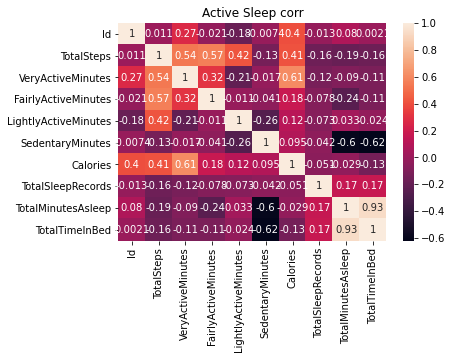

In [370]:
plot =sns.heatmap(meged_active_sleep.corr(), annot = True)
plot.set_title("Active Sleep corr")

In [372]:
px.scatter(meged_active_sleep, x = 'TotalTimeInBed', y = 'SedentaryMinutes',symbol = 'PersonID',color = 'PersonID', marginal_x='histogram',marginal_y = 'box' ,trendline  ='ols', height  =600, title ='SedentaryMinutes vs Total time In Bed')

In [377]:
pvalue_test(meged_active_sleep, 'TotalTimeInBed')

Index(['Id', 'TotalSteps', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories', 'PersonID',
       'Day', 'TotalSleepRecords', 'TotalMinutesAsleep', 'TotalTimeInBed'],
      dtype='object')
Based on column: TotalTimeInBed
Column Name :  VeryActiveMinutes
1.2235799205377071e-06
Significant - 1.2235799205377071e-06 - to TotalTimeInBed with VeryActiveMinutes
Column Name :  FairlyActiveMinutes
0.0003250550645763963
Significant - 0.0003250550645763963 - to TotalTimeInBed with FairlyActiveMinutes
Column Name :  LightlyActiveMinutes
0.48768548352014307
Column Name :  SedentaryMinutes
3.2135616543509215e-39
Significant - 3.2135616543509215e-39 - to TotalTimeInBed with SedentaryMinutes
Column Name :  Calories
0.000604580195595104
Significant - 0.000604580195595104 - to TotalTimeInBed with Calories
Column Name :  PersonID
6.348710019920468e-06
Significant - 6.348710019920468e-06 - to TotalTimeInBed with PersonID
Column Name :  Day
0.692159647

[(1.2235799205377071e-06, 'TotalTimeInBed', 'VeryActiveMinutes'),
 (0.0003250550645763963, 'TotalTimeInBed', 'FairlyActiveMinutes'),
 (3.2135616543509215e-39, 'TotalTimeInBed', 'SedentaryMinutes'),
 (0.000604580195595104, 'TotalTimeInBed', 'Calories'),
 (6.348710019920468e-06, 'TotalTimeInBed', 'PersonID'),
 (0.0288620667403025, 'TotalTimeInBed', 'TotalSleepRecords'),
 (2.949587826052145e-136, 'TotalTimeInBed', 'TotalMinutesAsleep'),
 (3.853082686582326e-201, 'TotalTimeInBed', 'TotalTimeInBed')]

## experimentation of the signals
Based on changes / differences of values. 
simply plots per person of the DSP values

 std: 0.012404660099056417
max: 0.6545454545454545
min: -0.3151515151515152
amount of drastic changes: 31


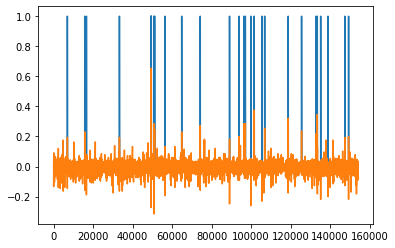

 std: 0.03425202333779087
max: 0.5806451612903225
min: -0.37096774193548376
amount of drastic changes: 1


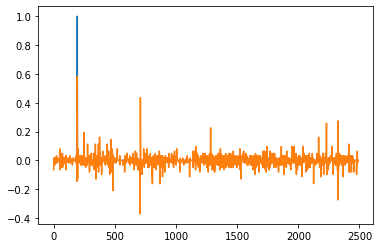

 std: 0.015717302156060965
max: 0.6095890410958905
min: -0.363013698630137
amount of drastic changes: 28


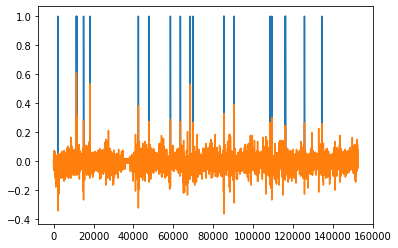

 std: 0.007616525667478592
max: 0.37241379310344835
min: -0.6827586206896552
amount of drastic changes: 130


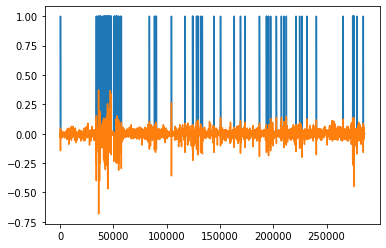

 std: 0.017295734394618005
max: 0.375886524822695
min: -0.35460992907801414
amount of drastic changes: 17


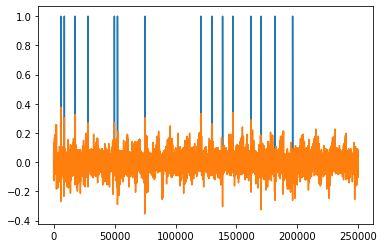

 std: 0.01570269668135725
max: 0.45806451612903226
min: -0.4258064516129032
amount of drastic changes: 37


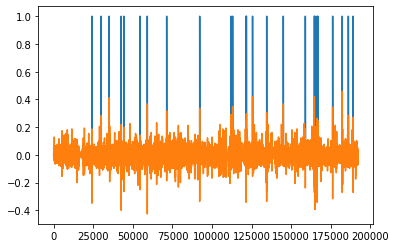

 std: 0.013330519505707884
max: 0.6610169491525423
min: -0.3220338983050848
amount of drastic changes: 21


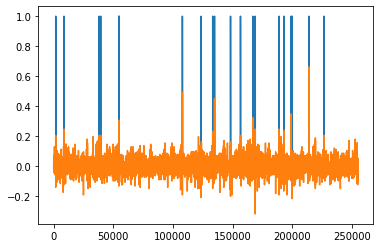

 std: 0.015005594032544799
max: 0.572463768115942
min: -0.6956521739130436
amount of drastic changes: 119


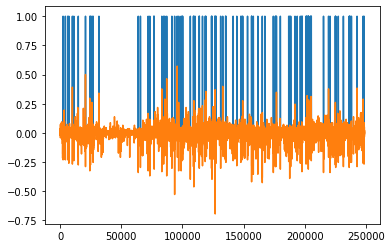

 std: 0.01785328784836719
max: 0.7226277372262774
min: -0.39416058394160586
amount of drastic changes: 15


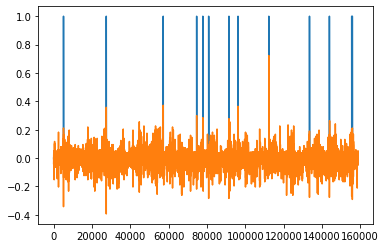

 std: 0.02227297419360664
max: 0.5737704918032787
min: -0.8770491803278688
amount of drastic changes: 16


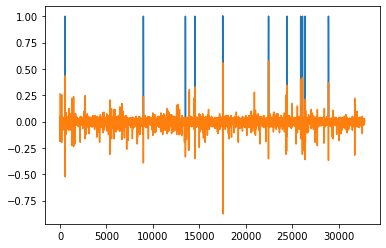

 std: 0.014078201477394867
max: 0.6496350364963505
min: -0.6058394160583942
amount of drastic changes: 37


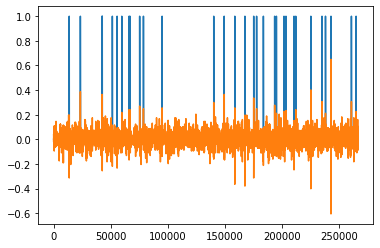

 std: 0.018659165676890143
max: 0.39285714285714285
min: -0.4374999999999999
amount of drastic changes: 24


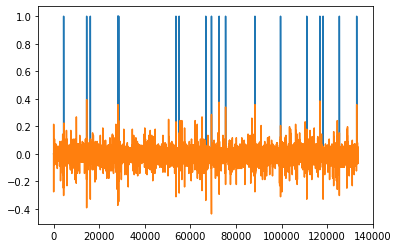

 std: 0.020446257655366132
max: 0.5304347826086957
min: -0.4956521739130435
amount of drastic changes: 30


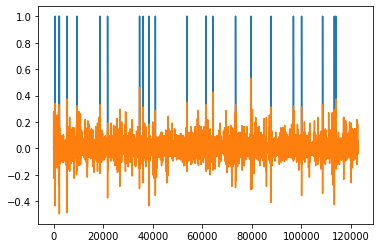

In [222]:
Heart_By_Idx2 = Heart_By_Idx.copy()

for i in range(13):
    data_= np.array(Heart_By_Idx.loc[Heart_By_Idx.PersonID ==i].Value)

    for day_num, day in enumerate(data_.Date.unique()):
        data_ = data_/ (data_.max()- data_.min())
        diff_ = np.array([data_[curr] - data_[curr-1] for curr in range(1,len(data_))])
        print(f" std: {diff_.std()}")
        print(f"max: {diff_.max()}")
        print(f"min: {diff_.min()}")

        amount_of_unusual_changes = np.where(np.abs(diff_) >=15* np.abs(diff_.std()),1,0)
        print(f"amount of drastic changes: {amount_of_unusual_changes.sum()}")

        plt.plot(amount_of_unusual_changes)
        plt.plot(diff_)	#plot the points

        plt.show()
        # input()

In [166]:
sleepRate = read_file(data_csvs[-2])
sleepRate

sleepDay_merged.csv


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712
...,...,...,...,...,...
408,8792009665,4/30/2016 12:00:00 AM,1,343,360
409,8792009665,5/1/2016 12:00:00 AM,1,503,527
410,8792009665,5/2/2016 12:00:00 AM,1,415,423
411,8792009665,5/3/2016 12:00:00 AM,1,516,545


In [22]:
pd.Timestamp('2014-01-23 00:00:00', tz=None).to_pydatetime()

df= read_file(data_csvs[4])
df.dropna(subset=list(df.columns), how='any', axis=0).reset_index(inplace = True)

df['Time'] = pd.to_datetime(df['Time']).dt.date

heartrate_seconds_merged.csv
['Id', 'Time', 'Value']


In [155]:
Sleepingdata= read_file(data_csvs[-2])
sleep_ID= Sleepingdata.Id.unique()


sleepDay_merged.csv
['Id', 'SleepDay', 'TotalSleepRecords', 'TotalMinutesAsleep', 'TotalTimeInBed']


In [148]:
print(sleep_ID== unique_ID)

False


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\4166130050.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  print(sleep_ID== unique_ID)


In [156]:
data2= read_file(data_csvs[4])
print(f"Number of measured Heart Beat Perople:")
print( {len(data2.groupby("Id").count())})
unique_ID= data2.Id.unique()


heartrate_seconds_merged.csv
['Id', 'Time', 'Value']
Number of measured Heart Beat Perople:
{14}


In [162]:
print((list(unique_ID))

None


In [111]:
data2= read_file(data_csvs[2])
p2_2= data2[data2.Id ==1503960366]

datasleep= read_file(data_csvs[-2])
p1 = datasleep[datasleep.Id ==1503960366]
p1.rename(columns={'SleepDay': 'Date'},
          inplace=True, errors='raise')
p2_2.rename(columns={'ActivityDay': 'Date'},
          inplace=True, errors='raise')

p1.Date = p1.Date.str.slice(0, -11,1)

# d = p1.SleepDay.apply(lambda x: dt.datetime.strptime(x,infer_datetime_format=True))
# p1['SleepDay'] = pd.to_datetime(p1['SleepDay']) 

pd.merge(p2_2, p1)
# Intensives= data2.groupby("Id").sum()[['TotalSteps','Calories' ]]

dailyIntensities_merged.csv
['Id', 'ActivityDay', 'SedentaryMinutes', 'LightlyActiveMinutes', 'FairlyActiveMinutes', 'VeryActiveMinutes', 'SedentaryActiveDistance', 'LightActiveDistance', 'ModeratelyActiveDistance', 'VeryActiveDistance']
sleepDay_merged.csv
['Id', 'SleepDay', 'TotalSleepRecords', 'TotalMinutesAsleep', 'TotalTimeInBed']


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3863648179.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p1.rename(columns={'SleepDay': 'Date'},
C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3863648179.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p2_2.rename(columns={'ActivityDay': 'Date'},
C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3863648179.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

,Id,Date,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed


In [109]:

p2_2

,Id,Date,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
0,1503960366,4/12/2016,728,328,13,25,0.0,6.06,0.55,1.88
1,1503960366,4/13/2016,776,217,19,21,0.0,4.71,0.69,1.57
2,1503960366,4/14/2016,1218,181,11,30,0.0,3.91,0.40,2.44
3,1503960366,4/15/2016,726,209,34,29,0.0,2.83,1.26,2.14
4,1503960366,4/16/2016,773,221,10,36,0.0,5.04,0.41,2.71
5,1503960366,4/17/2016,539,164,20,38,0.0,2.51,0.78,3.19
6,1503960366,4/18/2016,1149,233,16,42,0.0,4.71,0.64,3.25
7,1503960366,4/19/2016,775,264,31,50,0.0,5.03,1.32,3.53
8,1503960366,4/20/2016,818,205,12,28,0.0,4.24,0.48,1.96
9,1503960366,4/21/2016,838,211,8,19,0.0,4.65,0.35,1.34


In [ ]:
data2= read_file(data_csvs[2])
data2[data2.Id ==1503960366].ActivityDay


In [33]:
data0= read_file(data_csvs[4])
steps_Calories= data0.groupby("Id").sum()[['TotalSteps','Calories' ]]

,TotalSteps,Calories
Id,,
1503960366,375619,56309
1624580081,178061,45984
1644430081,218489,84339
1844505072,79982,48778
1927972279,28400,67357
2022484408,352490,77809
2026352035,172573,47760
2320127002,146223,53449
2347167796,171354,36782
